# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.utils import to_categorical
from keras.layers import Dropout, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [2]:
# Your code here
data = pd.read_csv('data_all.zip')
data.head(10)

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
#definimos algunas coas primero

input_shape = (28, 28, 1)
X = np.array(data.iloc[:, 1:])
y = to_categorical(np.array(data.iloc[:, 0]))

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)
X_train=X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test=X_test.reshape((X_test.shape[0], 28, 28, 1))

In [38]:
#normalizamos
X_train=X_train.astype('float')/255
X_test=X_test.astype('float')/255

In [39]:
batch=256
n_clases=62
epocas=50

In [40]:
modelo=Sequential()

modelo.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
modelo.add(MaxPooling2D((2,2)))
modelo.add(Dropout(0.25))

modelo.add(Conv2D(64, (3,3), activation='relu'))
modelo.add(MaxPooling2D((2,2)))
modelo.add(Dropout(0.25))

modelo.add(Conv2D(128, (3,3), activation='relu'))
modelo.add(Dropout(0.4))
modelo.add(Flatten())

modelo.add(Dense(128, activation='relu'))
modelo.add(Dropout(0.3))

modelo.add(Dense(n_clases, activation='softmax'))

modelo.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [41]:
modelo.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 128)        

In [42]:
historico=modelo.fit(X_train, y_train, batch_size=batch, epochs=epocas, verbose=0)

In [43]:
score=modelo.evaluate(X_test, y_test, verbose=1)
print ('Perdida (testeo)', score[0])
print ('Accuracy (testeo)', score[1])

23265/23265 [==============================] - 6s 261us/step
Perdida (testeo) 0.3825824528439381
Accuracy (testeo) 0.8592736124992371


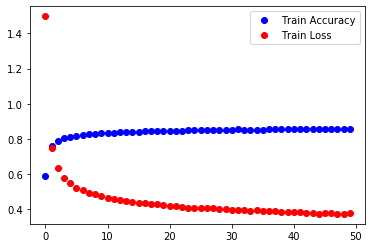

In [44]:
%matplotlib inline

acc=historico.history['accuracy']
loss=historico.history['loss']
epocas=range(len(acc))

plt.plot(epocas, acc, 'bo', label='Train Accuracy')
plt.plot(epocas, loss, 'ro', label='Train Loss')
plt.legend()
plt.plot();